In [ ]:
import pandas as pd

In [ ]:
import pandas_datareader as pdr
key = 'fc74c492e8004d1ab9230ebdcdbd6bb84d06d9e0'
df = pdr.get_data_tiingo('AAPL',api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-20 00:00:00+00:00,95.10,96.570,95.030,96.00,34411901,22.207129,22.550394,22.190783,22.417291,137647604,0.0,1.0
1,AAPL,2016-06-21 00:00:00+00:00,95.91,96.350,94.676,94.94,35546358,22.396275,22.499021,22.108119,22.169767,142185432,0.0,1.0
2,AAPL,2016-06-22 00:00:00+00:00,95.55,96.890,95.350,96.25,29219122,22.312210,22.625118,22.265507,22.475669,116876488,0.0,1.0
3,AAPL,2016-06-23 00:00:00+00:00,96.10,96.290,95.250,95.94,32240187,22.440642,22.485010,22.242156,22.403280,128960748,0.0,1.0
4,AAPL,2016-06-24 00:00:00+00:00,93.40,94.655,92.650,92.91,75311356,21.810156,22.103215,21.635021,21.695734,301245424,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-06-11 00:00:00+00:00,127.35,127.44,126.100,126.53,53522373,127.35,127.44,126.100,126.53,53522373,0.0,1.0
1254,AAPL,2021-06-14 00:00:00+00:00,130.48,130.54,127.070,127.82,96906490,130.48,130.54,127.070,127.82,96906490,0.0,1.0
1255,AAPL,2021-06-15 00:00:00+00:00,129.64,130.60,129.390,129.94,62746332,129.64,130.60,129.390,129.94,62746332,0.0,1.0
1256,AAPL,2021-06-16 00:00:00+00:00,130.15,130.89,128.461,130.37,91339351,130.15,130.89,128.461,130.37,91339351,0.0,1.0
1257,AAPL,2021-06-17 00:00:00+00:00,131.79,132.55,129.650,129.80,96721669,131.79,132.55,129.650,129.80,96721669,0.0,1.0


In [ ]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [ ]:
X= df['close']

In [ ]:
X

0        95.10
1        95.91
2        95.55
3        96.10
4        93.40
         ...  
1253    127.35
1254    130.48
1255    129.64
1256    130.15
1257    131.79
Name: close, Length: 1258, dtype: float64

In [ ]:
X.reset_index()

,index,close
0,0,95.10
1,1,95.91
2,2,95.55
3,3,96.10
4,4,93.40
...,...,...
1253,1253,127.35
1254,1254,130.48
1255,1255,129.64
1256,1256,130.15


In [ ]:
X = X.drop(columns='index')

In [ ]:
X

0        95.10
1        95.91
2        95.55
3        96.10
4        93.40
         ...  
1253    127.35
1254    130.48
1255    129.64
1256    130.15
1257    131.79
Name: close, Length: 1258, dtype: float64

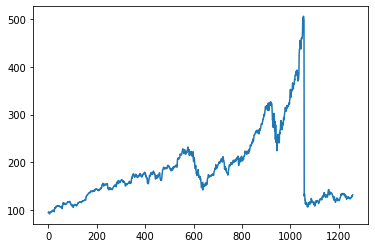

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X)

In [ ]:
import numpy as np


In [ ]:
X

0        95.10
1        95.91
2        95.55
3        96.10
4        93.40
         ...  
1253    127.35
1254    130.48
1255    129.64
1256    130.15
1257    131.79
Name: close, Length: 1258, dtype: float64

In [ ]:
arr = np.array(X)
arr

array([ 95.1 ,  95.91,  95.55, ..., 129.64, 130.15, 131.79])

In [ ]:
z=arr.reshape(-1,1)

In [ ]:
z

array([[ 95.1 ],
       [ 95.91],
       [ 95.55],
       ...,
       [129.64],
       [130.15],
       [131.79]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(z)

In [ ]:
X

array([[0.00739041],
       [0.0093467 ],
       [0.00847724],
       ...,
       [0.09081029],
       [0.09204202],
       [0.0960029 ]])

In [ ]:
## Train Test Split

In [ ]:
X[99]

array([0.04593648])

In [ ]:
len(X)

1258

In [ ]:
len(X)*0.65

817.7

In [ ]:
training_size = int(len(X)*0.65)
test_size = len(X)-training_size

In [ ]:
training_size, test_size

(817, 441)

In [ ]:
X[12]

array([0.00941915])

In [ ]:
X[0:3,:11]

array([[0.00739041],
       [0.0093467 ],
       [0.00847724]])

In [ ]:
X.shape

(1258, 1)

In [ ]:
train_data = X[0:training_size, :]
test_data = X[training_size:len(X),:]

In [ ]:
test_data

In [ ]:
train_data.shape

(817, 1)

In [ ]:
train_data

In [ ]:
import numpy 
def create_dataset(data, timestep):
  dataX, dataY= [] , []
  for i in range(len(data)-timestep-1):
    a = data[i: (i+timestep), 0]
    dataX.append(a)
    dataY.append(data[i+timestep,0])
  return numpy.array(dataX), numpy.array(dataY)


In [ ]:
timestep=100
X_train , Y_train = create_dataset(train_data, timestep)
X_test , Y_test = create_dataset(test_data, timestep)

In [ ]:
print(X_train.shape), print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True , input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train ,Y_train , validation_data=(X_test, Y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
12/12 [==============================] - 2s 169ms/step - loss: 4.6544e-04 - val_loss: 0.0197
Epoch 2/10
12/12 [==============================] - 2s 168ms/step - loss: 4.4393e-04 - val_loss: 0.0192
Epoch 3/10
12/12 [==============================] - 2s 167ms/step - loss: 4.1797e-04 - val_loss: 0.0187
Epoch 4/10
12/12 [==============================] - 2s 167ms/step - loss: 4.0157e-04 - val_loss: 0.0181
Epoch 5/10
12/12 [==============================] - 2s 167ms/step - loss: 3.8887e-04 - val_loss: 0.0176
Epoch 6/10
12/12 [==============================] - 2s 165ms/step - loss: 3.8883e-04 - val_loss: 0.0169
Epoch 7/10
12/12 [==============================] - 2s 168ms/step - loss: 3.6150e-04 - val_loss: 0.0162
Epoch 8/10
12/12 [==============================] - 2s 168ms/step - loss: 3.3533e-04 - val_loss: 0.0156
Epoch 9/10
12/12 [==============================] - 2s 166ms/step - loss: 3.2781e-04 - val_loss: 0.0150
Epoch 10/10
12/12 [==============================] - 2s 167ms/st

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
len(train_predict)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

In [ ]:
## Plotting 

plt.plot(scaler.inverse_transform(X))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
look_back = 100

## shifting train predictions for plotting
trainplot = numpy.empty_like(X)
trainplot[:,:] = np.nan
trainplot[look_back:len(train_predict)+look_back,:]=train_predict

##shifting test predictions of plotting
testplot = numpy.empty_like(X)
testplot[:,:] = np.nan
testplot[len(train_predict)+(look_back*2)+1:len(X)-1,:]=test_predict

plt.figure(figsize=(10,10))
plt.plot(scaler.inverse_transform(X))
plt.plot(trainplot)
plt.plot(testplot)
plt.show()



In [ ]:
len(test_data)

In [ ]:
len(train_data)

817

In [ ]:
for i in range(len(train_data)):
  print(i)
  

In [ ]:
import numpy as np
l=[3,4,2,3,4,2,2,2]
arr = np.array(l)

In [ ]:
arr

array([3, 4, 2, 3, 4, 2, 2, 2])

In [ ]:
arr[0:2]

array([3, 4])

In [ ]:
len(l)

8

In [ ]:
l[1:9]

[4, 2, 3, 4, 2, 2, 2]

In [ ]:
X.shape